# Tree models lab

In [316]:
from sklearn import tree
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import numpy as np
import graphviz
from sklearn.datasets import load_iris
import sys

In [317]:
#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=20)

In [318]:
iris = load_iris()

### 1) Get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions

In [319]:
INFLATION = 10
# label = 0 = setosa
# label = 1 = versicolor
# label = 2 = virginica

###### Inflate del dataset (setosa = 50, versicolor = 500, virginica = 500)

In [320]:
#Per ogni esempio setosa vogliamo aggiungere 10 esempi virginica e versicolor
def inflate_class(label):
    size = len(iris.data) // 3 # flooring division: 150 // 3
    indices = np.arange(size*label, size*(label + 1)) # indici del dataset che contengono gli elementi della classe "label"
    return np.repeat(indices, INFLATION)

iris_setosa_indices = np.arange(0, 50) # 50
iris_versicolor_indices_inflated = inflate_class(label=1) # 50*10
iris_virginica_indices_inflated = inflate_class(label=2) # 50*10

iris_indices_inflated = np.concatenate([
    iris_setosa_indices,
    iris_versicolor_indices_inflated,
    iris_virginica_indices_inflated]) # len = 1050

###### Randomizziamo gli indici e li suddividiamo tra training set (70%) e test set (circa 30%)

In [321]:
np.random.shuffle(iris_indices_inflated)

indiceiris_indices_inflatedning=iris_indices_inflated[:-300]
indices_test=iris_indices_inflated[-300:]

iris_X_train = iris.data[indices_training]
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test]
iris_y_test  = iris.target[indices_test]

In [322]:
x = np.arange(10); print(x); print(x[:-3]); print(x[-3:]) # prova

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6]
[7 8 9]


In [323]:
# Dichiarazione del classificatore
clf = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=300,
    min_samples_leaf=5,
    class_weight={0:1,1:1,2:1}
)

# Fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

In [324]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[0 2 2 ... 1 1 2]
True classes:
[0 2 2 ... 1 1 2]
['setosa' 'versicolor' 'virginica']


In [325]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    color = "\x1b[31m" if (predicted_y_test[i] != iris_y_test[i]) else "\x1b[92m" 
    print(color + "Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\x1b[0m\n")

Instance # 24: 
Predicted: setosa	 True: setosa

Instance # 129: 
Predicted: virginica	 True: virginica

Instance # 137: 
Predicted: virginica	 True: virginica

Instance # 126: 
Predicted: virginica	 True: virginica

Instance # 84: 
Predicted: versicolor	 True: versicolor

Instance # 68: 
Predicted: versicolor	 True: versicolor

Instance # 105: 
Predicted: virginica	 True: virginica

Instance # 99: 
Predicted: versicolor	 True: versicolor

Instance # 112: 
Predicted: virginica	 True: virginica

Instance # 85: 
Predicted: versicolor	 True: versicolor

Instance # 128: 
Predicted: virginica	 True: virginica

Instance # 138: 
Predicted: virginica	 True: virginica

Instance # 100: 
Predicted: virginica	 True: virginica

Instance # 81: 
Predicted: versicolor	 True: versicolor

Instance # 99: 
Predicted: versicolor	 True: versicolor

Instance # 42: 
Predicted: setosa	 True: setosa

Instance # 38: 
Predicted: setosa	 True: setosa

Instance # 136: 
Predicted: virginica	 True: virginica

Instanc

In [326]:
# Print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 1.0
F1 score: 1.0


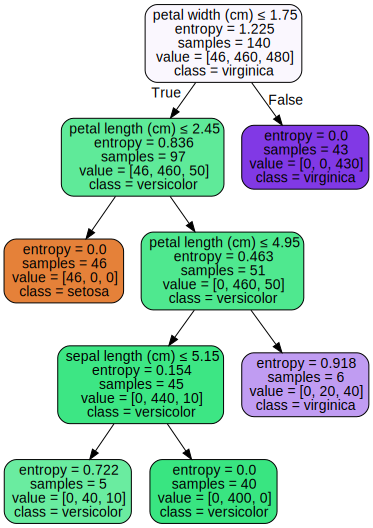

In [333]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
#graph

### 2) Modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor and vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.

In [328]:
# Dichiarazione del classificatore
clf = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=300,
    min_samples_leaf=5,
    class_weight={0:1,1:10,2:10}
)

In [329]:
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

In [330]:
clf = clf.fit(iris_X_train, iris_y_train)
predicted_y_test = clf.predict(iris_X_test)

In [331]:
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


### 3) learn trees but avoid overfitting (by improving the error on the test set) tuning the parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.

In [332]:
learn trees but avoid overfitting (by improving the error on the test set) tuning the parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.
build the confusion matrix of the created tree models on the test set and show them. 
build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

SyntaxError: invalid syntax (<ipython-input-332-57970a6a3f1e>, line 1)